In [1]:
## Training a machine learning model with scikit-learn

In [2]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/Users/tpalczewski/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [6]:
N=5000 # Number of observations
feature_number = 2 # Number of features
list_of_eveything = np.random.random((N,feature_number))
print(list_of_eveything)

[[ 0.44258855  0.53549069]
 [ 0.86924359  0.48969625]
 [ 0.63998964  0.36117062]
 ..., 
 [ 0.47616311  0.75131978]
 [ 0.75936622  0.79604166]
 [ 0.7192585   0.84945504]]


In [7]:
Xtr = list_of_eveything

In [8]:
what_is_what = (np.random.randint(2, size=(N))) 
what_is_what = np.array(what_is_what)
# list of 0s and 1s  
print(what_is_what)

[1 0 1 ..., 0 0 1]


In [9]:
Ytr = what_is_what

In [10]:
print(Xtr.shape)
print(Ytr.shape)

(5000, 2)
(5000,)


In [11]:
## we need some data for tests

In [12]:
size = 1500 
Xte = np.random.random((size, feature_number)) # M is number of features
what_is_what = (np.random.randint(2, size=(size))) 
Yte = what_is_what

In [13]:
print(Xte.shape)
print(Yte.shape)
## smaller set for testing
# 1500 observations with 2 features

(1500, 2)
(1500,)


In [14]:
# fit the model with data
logreg.fit(Xtr, Ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# predict the response values for the observations in X
y_pred = logreg.predict(Xte)

In [16]:
# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(Yte, y_pred))

0.492666666667


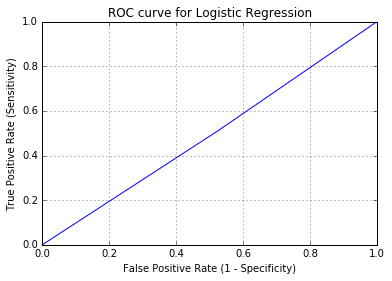

In [17]:
## ROC Curves and Area Under the Curve (AUC)
## IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(Yte, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [18]:
## Confusion matrix
confusion = metrics.confusion_matrix(Yte, y_pred)
TP = confusion[1, 1] # True Positive
print(TP)
TN = confusion[0, 0] # True Negative
print(TN)
FP = confusion[0, 1] # False Positive ("Type I error")
print(FP)
FN = confusion[1, 0] # False Negative ("Type II error")
print(FP)

[[362 400]
 [361 377]]
377
362
400
400


In [19]:
print(confusion)

[[362 400]
 [361 377]]


In [20]:
import tabletext
data  = [[" " , "Predicted 1" , "Predicted 0" ],
        ["True 1", TP, FN],
        ["True 0", FP ,TN],
        ]
print tabletext.to_text(data)

┌────────┬─────────────┬─────────────┐
│        │ Predicted 1 │ Predicted 0 │
├────────┼─────────────┼─────────────┤
│ True 1 │         377 │         361 │
├────────┼─────────────┼─────────────┤
│ True 0 │         400 │         362 │
└────────┴─────────────┴─────────────┘
